In [ ]:
! python -m pip install -U scikit-image
from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.0 MB 3.8 MB/s 
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.18.3
    Uninstalling scikit-image-0.18.3:
      Successfully uninstalled scikit-image-0.18.3
Mounted at /content/drive


In [ ]:
import sys
user = "pam"
# user = 'saurabh'
# user = 'aditya'

# define path to code 
if user == "pam":
  sys.path.append('/content/drive/MyDrive/Project/Codes/3d-super-res-cnn-master/h and w')
  print("using param's path")
elif user == 'saurabh':
  sys.path.append('/content/drive/MyDrive/809k/Project/Codes/3d-super-res-cnn-master/h and w')
  print("using saurabh's path")
else:
  sys.path.append('/content/drive/MyDrive/ENPM809K/Project/Codes/3d-super-res-cnn-master/h and w')

In [ ]:
import torch
import numpy
import matplotlib.pyplot as plt
import torch.nn as nn 
import torchvision
import torchvision.transforms as transforms
from torchsummary import summary

import os
import numpy as np
import cv2 as cv
import random
import math
from sklearn.utils import shuffle
import pdb
import re
import glob

import data_reader as reader
import utils
import params

SHOW_IMAGES = False 
 
params.show_params()   

if user == 'pam': 
  data_reader = reader.DataReader('/content/drive/MyDrive/Project/Datasets/5_Subjects', './data/validation', './data/test')
elif user == 'saurabh': 
  data_reader = reader.DataReader('/content/drive/MyDrive/809k/Project/Datasets', './data/validation', './data/test')
else:
  data_reader = reader.DataReader('/content/drive/MyDrive/ENPM809K/Project/Datasets', './data/validation', './data/test')



Instructions for updating:
non-resource variables are not supported in the long term







The configuration file is:
scale = 2 
folder base name = ../cnn-3d/3d-images 
folder name = 00001_0004 
image extension = png 
interpolation method = 4 
num epochs = 40 
loss = 1 
learning rate = 0.0001 
dim patch = 64 
dim depth = 16 
kernel size = 5 
folder data size = ./data_ckpt/ 
num_channels  = 1 



There are 2048 images in /content/drive/MyDrive/Project/Datasets/5_Subjects/IXI019-Guys-0702-T1/input_train_64_2/*png
The size of the first image is (32, 32)
There are 2048 images in /content/drive/MyDrive/Project/Datasets/5_Subjects/IXI024-Guys-0705-T1/input_train_64_2/*png
The size of the first image is (32, 32)
There are 2048 images in /content/drive/MyDrive/Project/Datasets/5_Subjects/IXI021-Guys-0703-T1/input_train_64_2/*png
The size of the first image is (32, 32)
There are 2048 images in /content/drive/MyDrive/Project/Datasets/5_Subjects/IXI017-Guys-0698-T1/input_train_64_2/*png
The size of the first image is (32, 32)
There are 2048 images in /content/drive/MyDrive/Project

Files were not sorted. Sorting files in utils.py using the following lambda function

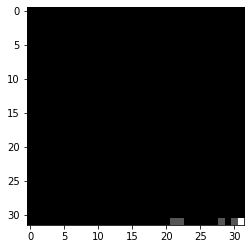

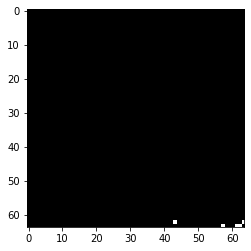

In [ ]:
#Target and input image are same now
import os
image , target = data_reader.get_next_batch_train(4050,1)
import matplotlib.pyplot as plt
plt.imshow(image[0,:,:,0],cmap='gray')
plt.show()
plt.imshow(target[0,:,:,0],cmap='gray')
plt.show()


In [ ]:
from custom_network_h_w import Net
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net()
model = model.to(device)
print(model)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (ELU1): ELU(alpha=1.0)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (ELU2): ELU(alpha=1.0)
  (conv3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (ELU3): ELU(alpha=1.0)
  (conv4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (ELU4): ELU(alpha=1.0)
  (conv5): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (ELU5): ELU(alpha=1.0)
  (conv6): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (ELU6): ELU(alpha=1.0)
  (conv7): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (ELU7): ELU(alpha=1.0)
  (conv8): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (ELU8): ELU(alpha=1.0)
  (conv9): Conv2d(32, 4, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (ELU9): ELU(alpha=1.0)
  (depth2space): PixelShuffle(upscale_factor=2)
  (conv10): Conv2d(1, 32, kernel_size=(3, 3), str

In [ ]:
#training
params.folder_data = "/content/drive/MyDrive/ENPM809K/Project/Codes/3d-super-res-cnn-master/h and w/custom_data_ckpt/"
batch_size = 128

#loss
if params.LOSS == params.L1_LOSS:
	loss = nn.L1Loss()
if params.LOSS == params.L2_LOSS:
	# loss = torch.nn.MSELoss() 
  loss = nn.L1Loss()


#adaptive learing rate
lr = params.learning_rate 

#optimizer
# opt = tf.train.AdamOptimizer(starter_learning_rate).minimize(loss, global_step=global_step)

optimizer = torch.optim.Adam(model.parameters() , lr = params.learning_rate)

# scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10, eta_min=0)

# lambda1 = lambda epoch: 0.65 ** epoch
# scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda1)

print('the number of images is: ', data_reader.num_train_images)
print("Number of Epochs is: ", params.num_epochs)
loss_after_every_epoch = []
ssim_after_every_epoch = []
psnr_after_every_epoch = []
predicted_images = np.zeros((len(data_reader.train_images_in),64,64,1))

for epoch in range(params.num_epochs):
  print("Doing Epoch: " , epoch)
  batch_loss = 0
  num_images = 0
  num_iterations = math.floor(data_reader.num_train_images / batch_size)
  print("Doing Epoch: " , epoch)
  batch_loss = 0
  num_images = 0
  num_iterations = math.floor(data_reader.num_train_images / batch_size)
  print('the number of iterations is %d' % num_iterations)
  ssim_epoch = 0
  psnr_epoch = 0


  for i in range(0, num_iterations): 
    input_, target_  = data_reader.get_next_batch_train(i, batch_size)
    num_images += batch_size
    input_ = np.reshape(input_ , (batch_size, 1,32,32))
    input_ = torch.from_numpy(input_)
    
    input_ = input_.to(device,dtype = torch.float)

    target_ = np.reshape(target_ , (batch_size ,1,64,64))
    target_ = torch.from_numpy(target_)
    target_ = target_.to(device,dtype = torch.float)

    output = model(input_)
    loss_ = loss(output , target_  )
    
    #sets gradients to zero before backprop
    optimizer.zero_grad()
    #backprop
    loss_.backward()

    optimizer.step()
    # scheduler.step()
    
    # ssim_batch, psnr_batch = utils.compute_ssim_psnr_batch(np.round(output.detach().cpu().numpy()), np.round(target_.detach().cpu().numpy()))
    output = output.cpu().data.numpy()
    target_ = target_.cpu().data.numpy()

    if epoch == params.num_epochs-1:
      predicted_images[i*batch_size:(i+1)*batch_size, :, :, :] = output.reshape(batch_size,64,64,1)


    ssim_batch, psnr_batch = utils.compute_ssim_psnr_batch(np.round(output.reshape(batch_size,64,64,1)), np.round(target_.reshape(batch_size,64,64,1)))
    
    batch_loss += loss_ * batch_size
    ssim_epoch += ssim_batch
    psnr_epoch += psnr_batch
    print("Epoch/Iteration {}/{} ...".format(epoch, i), "Training loss: {:.4f}  ssim: {:.4f} psnr: {:.4f}".
			  format(batch_loss/num_images, ssim_epoch/num_images, psnr_epoch/num_images), "Learning rate:  {:.8f}".
			  format(lr))

    # print("Epoch/Iteration {}/{} ...".format(epoch, i), "Training loss: {:.4f}  ".format(batch_loss/num_images) , "Learning rate:  {:.8f}".format(lr))
  loss_after_every_epoch.append(batch_loss)
  if user == 'pam':
    PATH = "/content/drive/MyDrive/Project/Codes/3d-super-res-cnn-master/h and w/custom_data_ckpt/"
  else:
    PATH = "/content/drive/MyDrive/ENPM809K/Project/Codes/3d-super-res-cnn-master/h and w/custom_data_ckpt/"

  epoch = "Checkpoint_5Subjects" + str(epoch) + ".pth" 
  PATH = PATH + epoch
  print("saving checkpoint at: ", PATH )
  torch.save(model , PATH)
  ssim_epoch_normalized = ssim_epoch/num_images
  ssim_after_every_epoch.append(ssim_epoch_normalized) 
  psnr_after_every_epoch.append(psnr_epoch)


the number of images is:  10240
Number of Epochs is:  40
Doing Epoch:  0
Doing Epoch:  0
the number of iterations is 80


/usr/local/lib/python3.8/dist-packages/skimage/metrics/simple_metrics.py:163: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)


Epoch/Iteration 0/0 ... Training loss: 8.3026  ssim: 0.5725 psnr: 34.4865 Learning rate:  0.00010000
Epoch/Iteration 0/1 ... Training loss: 12.4735  ssim: 0.6278 psnr: 37.2677 Learning rate:  0.00010000
Epoch/Iteration 0/2 ... Training loss: 17.6590  ssim: 0.6142 psnr: 33.9035 Learning rate:  0.00010000
Epoch/Iteration 0/3 ... Training loss: 21.6986  ssim: 0.5786 psnr: 30.0202 Learning rate:  0.00010000
Epoch/Iteration 0/4 ... Training loss: 27.0707  ssim: 0.5376 psnr: 26.8449 Learning rate:  0.00010000
Epoch/Iteration 0/5 ... Training loss: 32.0677  ssim: 0.4991 psnr: 24.3303 Learning rate:  0.00010000
Epoch/Iteration 0/6 ... Training loss: 35.6758  ssim: 0.4658 psnr: 22.5120 Learning rate:  0.00010000
Epoch/Iteration 0/7 ... Training loss: 38.3979  ssim: 0.4375 psnr: 21.1425 Learning rate:  0.00010000
Epoch/Iteration 0/8 ... Training loss: 40.3529  ssim: 0.4130 psnr: 20.0911 Learning rate:  0.00010000
Epoch/Iteration 0/9 ... Training loss: 41.3459  ssim: 0.3923 psnr: 19.3361 Learning

In [ ]:
n_images_per_subject = 128
n_subjects = predicted_images.shape[0]//2048
subject = []
for n in range(n_subjects): 
  subject_data = np.zeros((128, 256,256))
  print('subject change')
  for k in range(n_images_per_subject):
    img = np.zeros((256,256))
    for i in range(4):
      for j in range(4):
        img[i*64:(i+1)*64, j*64:(j+1)*64] = predicted_images[k*16+i*4+j, :,:,0]
        # print(k*16+i*4+j)
    subject_data[k,:,:] = img
  subject.append(subject_data)

subject change
subject change
subject change
subject change
subject change


In [ ]:
import numpy as np
import cv2
import os
import shutil

def create_patches_d(image, dim_patch, stride, resize_factor, folder_in, folder_gt, current_mri, current_slice):
    h, w = image.shape
    idx_image = 0
    for i in range(0, h - dim_patch + 1, stride):
        for j in range(0, w - dim_patch + 1, stride):
            idx_image += 1
            gt_patch = image[i: i + dim_patch, j: j + dim_patch]
            if np.random.random(1) < 0.5:
                dim = (int(gt_patch.shape[1]/resize_factor), int(gt_patch.shape[0]/resize_factor))
                in_patch = cv2.resize(src = cv2.GaussianBlur(gt_patch, (3,3), 0), \
                    dsize = dim, interpolation=cv2.INTER_AREA)
            else:
                dim = (int(gt_patch.shape[1]/resize_factor), int(gt_patch.shape[0]/resize_factor))
                in_patch = cv2.resize(src = gt_patch, \
                    dsize = dim, interpolation=cv2.INTER_AREA)
            
            # if np.sum(in_patch) == 0:
            #     continue
            
            cv2.imwrite(folder_gt + "/" + str(current_mri+1) + '_' + str(current_slice+1) + '_' + str(idx_image)+ ".png", gt_patch)
            cv2.imwrite(folder_in + "/" + str(current_mri+1) + '_' + str(current_slice+1) + '_'+ str(idx_image)+ ".png", in_patch)
    
    return 


def resize_train_d(mri_img_list, dim_patch, stride, resize_factor):
    
    for mri_index in range(len(mri_img_list)):
      subject_name = 'Subject_' + str(mri_index+1)
      base_path = '/content/drive/MyDrive/Project/custom_h_and_w_output/'
      folder_in = base_path + subject_name + '/input_train_d_' + str(dim_patch) + '_' + str(resize_factor)+'/'
      folder_gt = base_path + subject_name + '/gt_train_d_' + str(dim_patch) + '_' + str(resize_factor)
      folder_og = base_path + subject_name + '/original_train_d_' + str(dim_patch) + '_' + str(resize_factor)
      os.makedirs(folder_in)
      os.makedirs(folder_gt)
      os.makedirs(folder_og)
      mri = mri_img_list[mri_index]
      total_slices = mri.shape[2]
      # iterate through slices
      for current_slice in range(0, total_slices):
          image_name = str(mri_index+1) + '_' + str(current_slice+1) + '.png'
          cv2.imwrite(folder_og + '/' + image_name, mri[:,:,current_slice])
          # shutil.move(image_name, folder_og)
          create_patches_d(mri[:,:,current_slice], dim_patch, stride, resize_factor, folder_in, folder_gt, mri_index, current_slice)

    return

In [ ]:
# ------------------ USAGE ----------------
dim_patch = 64
stride = 64
resize_factor = 2
# for i in range(len(subject)):
resize_train_d(subject, dim_patch, stride, resize_factor)

In [ ]:
np.save('/content/drive/MyDrive/Project/custom_h_and_w_output/subject_5', subject[4])

In [ ]:
# import matplotlib.pyplot as plt
# subject_1 = np.load('/content/drive/MyDrive/ENPM809K/Project/custom_h_and_w_output/subject_1.npy')
# print(subject_1.shape)

(128, 256, 256)


In [ ]:
# # ------------------ USAGE ----------------
# dim_patch = 64
# stride = 64
# resize_factor = 2
# # for i in range(len(subject)):
# resize_train_d([subject_1], dim_patch, stride, resize_factor)

In [ ]:
print(subject[0][1,:,:].shape)

(256, 256)


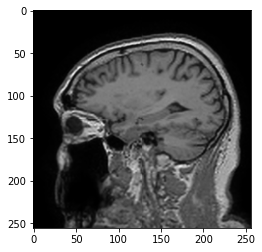

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(subject[0][100,:,:], cmap = 'gray')

In [ ]:
# eval and save the images
loaded_model = torch.load("/content/drive/MyDrive/Project/Codes/3d-super-res-cnn-master/h and w/custom_data_ckpt/Checkpoint_Checkpoint_39.pth")



In [ ]:
PATH = "/content/drive/MyDrive/Project/Codes/3d-super-res-cnn-master/h and w/custom_data_ckpt/"
epoch = "Checkpoint_" + str(epoch) + ".pth" 
PATH = PATH + epoch
print("saving checkpoint at: ", PATH )
